In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=0
adversaryProbs[1]=0
adversaryProbs[6]=1
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25, adversaryProbs=adversaryProbs, advHistoryNum=2)
adversaryProbs

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [3]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000,   0.0000,   0.0000]), 0, False)

In [4]:
game.adversaryChoosePrice()

132

In [5]:
neuralNet=NeuralNetwork(num_input=3+game.advHistoryNum, lr=0.00009)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=1_000_000, discountFactor =0.9)

0
tensor([ 2, 20, 33,  8,  1,  4,  3, 17, 30, 36, 17, 18, 36, 48, 41,  8,  0, 48,
        48, 40, 43,  4, 19, 23, 19])
10000
tensor([48, 11, 49, 37,  2, 38, 11, 35, 49, 27, 40, 30,  8, 18, 45, 22, 44, 18,
        49, 20, 43,  5, 34, 39, 20])
20000
tensor([26, 46, 42, 49, 31, 23, 45, 20, 17, 10, 19, 37,  3, 35, 45, 48, 17, 12,
        18, 30, 17, 28,  3, 29, 39])
30000
tensor([ 3, 16, 27, 47, 21, 49, 23, 22, 45, 33, 28, 38, 12, 38, 43, 24, 29, 47,
        38, 14, 21, 48, 17, 43, 29])
40000
tensor([17, 18, 12, 20, 39,  5, 36, 48,  5, 25, 45, 18, 39, 27, 16, 30, 44, 12,
        27, 39, 25, 44, 40, 42,  0])
50000
tensor([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 11,
        11, 48, 48, 37, 14,  5, 37])
60000
tensor([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 45, 43, 22, 47, 28, 19, 40, 43,
        35, 49,  6, 11, 25, 29, 26])
70000
tensor([ 3, 11, 11, 11, 11,  2, 11, 11, 11,  0, 49,  0,  3,  9, 49, 15, 37,  9,
        41, 11, 20,  2, 21, 17, 35])
80000
tensor([11, 11

670000
tensor([ 0,  0,  0,  0, 48, 48, 48, 48,  4, 19, 19, 19,  4,  4,  4,  4,  4,  5,
         4,  2,  5, 32, 43, 43, 44])
680000
tensor([ 0,  0,  0,  0, 48, 48, 48, 48,  4, 19, 19,  4,  4,  4,  4,  2,  4,  4,
         4,  4,  3,  2,  1, 13, 32])
690000
tensor([ 0,  0,  0,  3, 48, 48, 48, 48,  3, 19, 19,  2,  4,  4,  4,  4,  4,  4,
         3,  0,  3,  2,  3, 32, 44])
700000
tensor([ 0,  0,  0,  0, 48, 48, 48,  2, 48,  4, 19,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4, 20, 31, 45, 46])
710000
tensor([ 0,  0,  0,  3, 48, 48, 48,  2, 48,  4, 19,  4,  4,  4,  4,  4,  4,  4,
         3,  4,  4,  0, 20, 38, 44])
720000
tensor([ 0,  0,  0,  0, 48, 48, 48,  2, 48,  4, 19,  4,  4,  4,  4,  4,  4,  4,
         1,  4,  4,  3, 15, 30, 46])
730000
tensor([ 0,  0,  0,  0, 48, 48, 48,  3, 48,  4, 19,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4, 15, 38, 46])
740000
tensor([ 0,  0,  0,  0, 48, 48, 48,  0, 48,  4, 19,  4,  4,  4,  4,  4,  4,  4,
         2,  3,  1,  3, 14, 42, 45])
750000
t

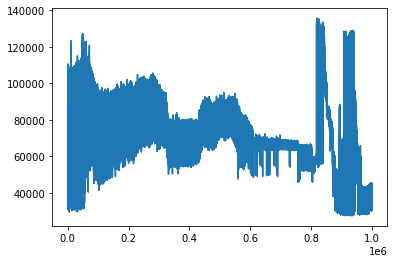

In [6]:
algorithm.solver()

In [7]:
advModeNames=""
for i in range(len(adversaryProbs)):
    if adversaryProbs[i]!=0:
        tmp="{:.1f}".format(adversaryProbs[i])
        advModeNames+=f"{(AdversaryModes(i)).name}-{tmp}-"
    
name=f"ep {algorithm.numberEpisodes}, {advModeNames}, {game.advHistoryNum} hist, {neuralNet.lr} lr"
neuralNet.save(name=name)

In [8]:
# neuralNet.load(name=name)
"hi"

In [9]:
algorithm.bestAverageRetu

0

In [10]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

,0,1
0,200.000000,200.000000
1,216.250000,183.750000
2,190.937500,209.062500
3,183.953125,216.046875
4,166.714844,233.285156
5,153.786133,246.213867
6,144.089600,255.910400
7,136.817200,263.182800
8,131.362900,268.637100
9,127.272175,272.727825


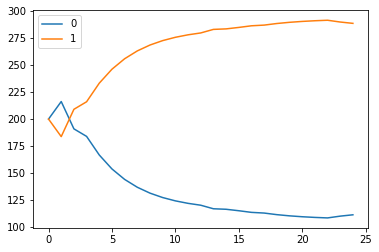

In [11]:
demandPotential.plot()
demandPotential

In [12]:
profits.sum(axis=0)

0    41489.002050
1    58859.103181
dtype: float64

,0,1
0,4271.250000,4148.000000
1,6315.140625,1027.500000
2,3643.813477,1280.625000
3,4004.273987,1350.468750
4,2984.336735,1522.851562
5,2316.888876,1652.138672
6,1871.149590,1749.104004
7,1567.696342,1821.828003
8,1357.460216,1876.371002
9,1209.544639,1917.278252


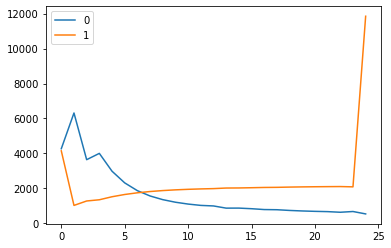

In [13]:
profits.plot()
profits


,0,1
0,99.500000,132.000000
1,131.625000,81.000000
2,94.968750,81.000000
3,115.476562,81.000000
4,106.857422,81.000000
5,100.393066,81.000000
6,95.544800,81.000000
7,91.908600,81.000000
8,89.181450,81.000000
9,87.136087,81.000000


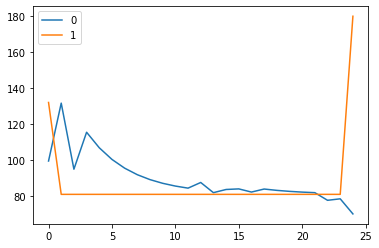

In [14]:
prices.plot()
prices

<AxesSubplot:>

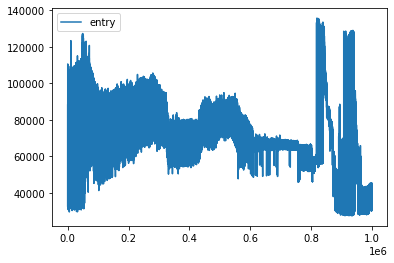

In [15]:
learning.plot()

In [16]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [19]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

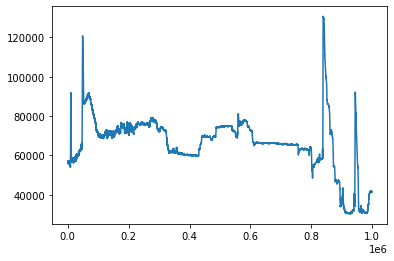

In [20]:
plt.plot(avg_learning)
plt.show()